<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/02-linear-regression/LinearRegression_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1 (3 points)

Consider the following toy dataset:

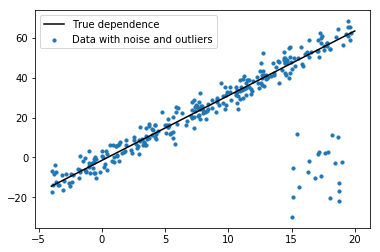

In [2]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

In [10]:
from sklearn.metrics import mean_absolute_error

def predict(X,w):
    X_train = np.hstack((X, np.ones((n, 1))))
    y_pred = X_train @ w
    return y_pred

def MAE(y,y_pred):
    return np.mean(np.abs(y - y_pred))

def MAE_gradient(X,y):
    n = X.shape[0]
    X_ = np.hstack((X, np.ones((n, 1))))
        
    sign = np.vectorize(lambda a: 1 if a > 0 else -1)
    
    return X_.T@(sign(X_@w - y))/n




In [11]:
learning_rate=0.001
epoch = 1000
n=len(X)
losses=[]
w = np.random.randn(2)

for i in range(epoch):
    gradient = MAE_gradient(X, y)
    w -= learning_rate * gradient
    y_pred = predict(X, w)
    losses.append(MAE(y, y_pred))



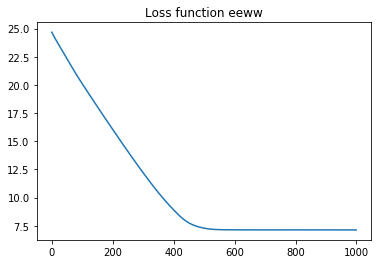

In [12]:
plt.title("Loss function eeww")
plt.plot(losses)
plt.show()

## USING SKLEARN

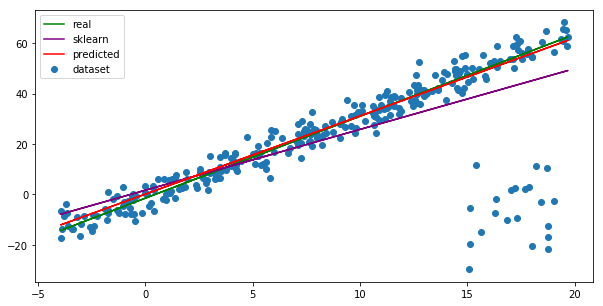

In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.reshape(-1,1), y)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='dataset')
plt.plot(X, true_function(X), label='real', c='g')
plt.plot(X, reg.predict(X), label='sklearn', c='purple')
plt.plot(X, predict(X,w), label='predicted', c='r')
plt.legend()


The MAE is not so sensitive to the outliers rather than sklearn. And also, by using the gradient descent, we improved the prediction in whole. 

## Task 2 (2 + 1 points)

* Wrap your solution from the previous task into a class. Plot the learning curve and the final fit. Compare and comment your results with the previos ones. **(2 points)**

* Make it possible to choose a loss function. **(1 point)**